In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd

data=[]
basepath='./dataset/'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=np.array(Image.open(file.path))
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            #print(features)
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

        

In [2]:
df = pd.read_csv('curdata.csv')

print(df)

lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

             R           G           B  class
0   168.297116  166.916634  147.622239  melon
1   148.120454  129.730706   84.095644  melon
2   167.784948  185.993343  154.655526  melon
3   196.768134  141.608358  129.949422  melon
4   197.140620  180.728821  164.112516  melon
5   201.343132  178.403477  150.458885  melon
6   183.684125  166.237991  158.600523  melon
7   196.470860  141.299167  129.609906  melon
8   199.082321  173.717302  156.207361  melon
9   148.120454  129.730706   84.095644  melon
10  201.555231  178.403240  150.458711  melon
11  189.823599  166.848825  138.574727  melon
12  191.587782  189.287298  163.040907  melon
13  217.580051  207.051803  196.408483  melon
14  183.697586  166.246138  158.615903  melon
15  166.002805  170.964622  143.596484  melon
16  165.805154  171.062572  143.588772  melon
17  165.781071  171.099615  143.586696  melon
18  197.161228  180.732945  164.085418  melon
19  216.195410  224.071833  198.716443  melon
20  232.690826  232.248174  170.52

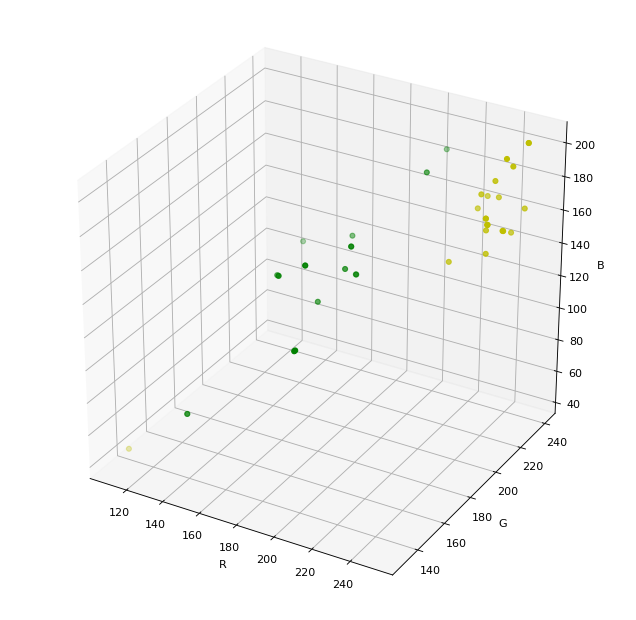

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[168.29711584 166.91663356 147.622239  ]
 [148.12045432 129.73070617  84.09564444]
 [167.78494815 185.99334321 154.65552593]
 [196.76813441 141.60835753 129.94942204]
 [197.14062031 180.72882113 164.11251577]
 [201.34313243 178.40347689 150.45888548]
 [183.68412503 166.23799079 158.60052253]
 [196.47086022 141.29916667 129.60990591]
 [199.08232143 173.71730159 156.20736111]
 [148.12045432 129.73070617  84.09564444]
 [201.5552312  178.40324036 150.4587112 ]
 [189.82359924 166.84882479 138.57472697]
 [191.58778157 189.28729775 163.04090657]
 [217.58005109 207.05180301 196.40848334]
 [183.69758646 166.24613845 158.61590342]
 [166.00280494 170.96462222 143.59648395]
 [165.80515433 171.06257163 143.58877232]
 [165.78107128 171.09961522 143.58669619]
 [197.16122829 180.73294499 164.08541779]
 [216.19540984 224.07183308 198.71644312]
 [232.69082632 232.24817417 170.52845126]
 [243.80802228 229.53404324 197.48045324]
 [227.15680079 211.09931446 143.47723795]
 [242.30119403 217.10750249 148.87

In [5]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[6 0]
 [1 7]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

Enter image path : /home/krishna/Desktop/github/face-mask-detector/dataset/without_mask
It is a lemon


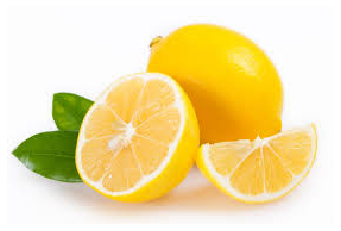

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=np.array(Image.open(file.path))
features=np.mean(im, axis=(0, 1)).tolist()
yp=svclassifier.predict([features])
yp=le.inverse_transform(yp)
print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()